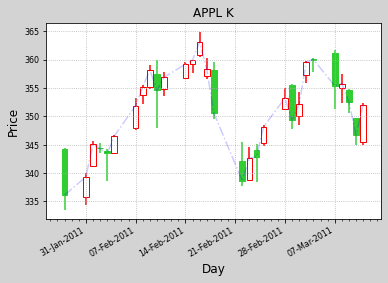

In [42]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
# 日期转换函数
def dmy2ymd(dmy):
    # 将日-月-年 转为 年-月-日
	dmy = str(dmy, encoding='utf-8')
	time = datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates, opening_prices,highest_prices, \
	lowest_prices, closeing_prices  = np.loadtxt('./data/aapl.csv',  # 读取文件
                  delimiter=',',  # 分隔符
                  usecols=(1, 3, 4, 5, 6),  # 要读取的列
                  dtype='M8[D], f8, f8, f8, f8',  # 每个维度的数据类型
                  unpack=True,  # 拆包
                  converters={1: dmy2ymd}  # 自定第几列使用的转换函数
                  )
# print(data)
plt.figure('APPL K', facecolor='lightgray')
plt.title('APPL K')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(linestyle=':')

#拿到坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器（每周一显示主刻度文本）
ax.xaxis.set_major_locator( md.WeekdayLocator(byweekday=md.MO) )
ax.xaxis.set_major_formatter(md.DateFormatter('%d-%b-%Y'))
#设置次刻度定位器为日定位器
ax.xaxis.set_minor_locator(md.DayLocator())
plt.tick_params(labelsize=8)
dates = dates.astype(md.datetime.datetime)  # numpy数据类型转换

plt.plot(dates, closeing_prices, color='blue', linestyle='-.', alpha=0.2)
plt.gcf().autofmt_xdate()  # 自动格式话x轴日期

#绘制每一天的蜡烛图
#填充色：涨为白色，跌为绿色
rise = closeing_prices >= opening_prices
color = np.array(['white' if x else 'limegreen' for x in rise])

#边框色：涨为红色，跌为绿色
edgecolor = np.array(['red' if x else 'limegreen' for x in rise])

#绘制线条
plt.vlines(dates, lowest_prices, highest_prices, color=edgecolor, zorder=0)
#绘制方块
plt.bar(dates, closeing_prices - opening_prices, 0.8,
	opening_prices, color=color, edgecolor=edgecolor)

plt.show()

In [43]:
import numpy as np
array = np.random.normal(10, 2, 100)
np.mean(array)  # 计算array的均值

9.826075856066856

In [47]:
import numpy as np
from datetime import datetime


# 日期转换函数
def dmy2ymd(dmy):
    # 将日-月-年 转为 年-月-日
    dmy = str(dmy, encoding='utf-8')
    time = datetime.strptime(dmy, '%d-%m-%Y').date()
    t = time.strftime('%Y-%m-%d')
    return t


closeing_prices = np.loadtxt('./data/aapl.csv',  # 读取文件
                             delimiter=',',  # 分隔符
                             usecols=(6,),  # 要读取的列
                             dtype='f8',
                             # 每个维度的数据类型
                             unpack=True,  # 拆包
                             # converters={1: dmy2ymd}
                             # 自定第几列使用的转换函数
                             )

mean = 0
for closing_price in closeing_prices:
    mean += closing_price
mean /= closeing_prices.size
print(mean)
mean = np.mean(closeing_prices)
print(mean)

351.03766666666667
351.0376666666667


In [48]:
import numpy as np
array = np.random.normal(10, 2, 100)
weights = np.random.random(100)
np.average(array, weights=weights)

10.30972364390164

In [49]:
import numpy as np
closing_prices, volumes = np.loadtxt(
    './data/aapl.csv', delimiter=',',
    usecols=(6, 7), unpack=True)
vwap, wsum = 0, 0
for closing_price, volume in zip(
        closing_prices, volumes):
    vwap += closing_price * volume
    wsum += volume
vwap /= wsum
print(vwap)
vwap = np.average(closing_prices, weights=volumes)
print(vwap)

350.5895493532009
350.5895493532009


In [2]:
import datetime as dt
import numpy as np

def dmy2days(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    days = (date - dt.date.min).days
    return days

days, closing_prices = np.loadtxt(
    './data/aapl.csv', delimiter=',',
    usecols=(1, 6), unpack=True,
    converters={1: dmy2days})
twap = np.average(closing_prices, weights=days)
print(twap)


351.0377051146597


In [3]:
import numpy as np
# 产生9个介于[10, 100)区间的随机数
a = np.random.randint(10, 100, 9)
print(a)
print(np.max(a), np.min(a), np.ptp(a))

[56 66 10 19 99 36 49 53 74]
99 10 89


In [5]:
import numpy as np
closing_prices = np.loadtxt(
    './data/aapl.csv', delimiter=',', usecols=(6,), unpack=True)
mean = np.mean(closing_prices)         # 算数平均值
devs = closing_prices - mean           # 离差
dsqs = devs ** 2                       # 离差方
pvar = np.sum(dsqs) / dsqs.size        # 总体方差
pstd = np.sqrt(pvar)                   # 总体标准差
svar = np.sum(dsqs) / (dsqs.size - 1)  # 样本方差
sstd = np.sqrt(svar)                   # 样本标准差
print(pstd, sstd)
pstd = np.std(closing_prices)          # 总体标准差
sstd = np.std(closing_prices, ddof=1)  # 样本标准差
print(pstd, sstd)

7.080008325481608 7.201042876260849
7.080008325481608 7.201042876260849


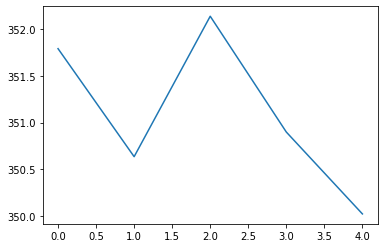

In [24]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
# 日期转换函数
def dmy2wday(dmy):
    # 将日-月-年 转为 年-月-日
	dmy = str(dmy, encoding='utf-8')
	time = datetime.strptime(dmy, '%d-%m-%Y').date()
	wday = time.weekday()
	return wday

wdays, closing_prices  = np.loadtxt('./data/aapl.csv',  # 读取文件
                  delimiter=',',  # 分隔符
                  usecols=(1, 6),  # 要读取的列
                  unpack=True,  # 拆包
                  converters={1: dmy2wday}  # 自定第几列使用的转换函数
                  )

ave = np.zeros(5)
for i in range(ave.size):
    ave[i] = np.mean(closing_prices[wdays == i])


plt.plot(ave)

In [26]:
import numpy as np

ary = np.arange(1,37).reshape((6, 6))

def apply(data):
    return np.mean(data)

print(np.mean(ary, axis=0))
print(np.apply_along_axis(apply, axis=0, arr=ary))


[16. 17. 18. 19. 20. 21.]
[16. 17. 18. 19. 20. 21.]


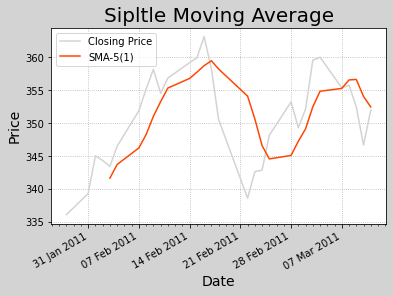

In [27]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md

def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd

dates, closing_prices = np.loadtxt('./data/aapl.csv', delimiter=',',
    usecols=(1, 6), unpack=True, dtype='M8[D], f8', converters={1: dmy2ymd})

sma51 = np.zeros(closing_prices.size - 4)
for i in range(sma51.size):
    sma51[i] = closing_prices[i:i + 5].mean()
# 开始绘制5日均线
plt.figure('Sipltle Moving Average', facecolor='lightgray')
plt.title('Sipltle Moving Average', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
ax = plt.gca()
# 设置水平坐标每个星期一为主刻度
ax.xaxis.set_major_locator(md.WeekdayLocator( byweekday=md.MO))
# 设置水平坐标每一天为次刻度
ax.xaxis.set_minor_locator(md.DayLocator())
# 设置水平坐标主刻度标签格式
ax.xaxis.set_major_formatter(md.DateFormatter('%d %b %Y'))
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
dates = dates.astype(md.datetime.datetime)
plt.plot(dates, closing_prices, c='lightgray', label='Closing Price')
plt.plot(dates[4:], sma51, c='orangered', label='SMA-5(1)')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

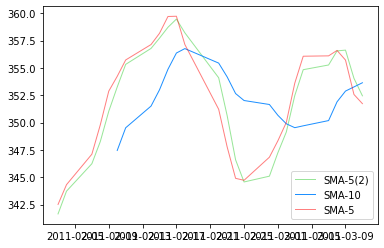

In [39]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd

dates, closing_prices = np.loadtxt('./data/aapl.csv', delimiter=',',
    usecols=(1, 6), unpack=True, dtype='M8[D], f8', converters={1: dmy2ymd})

# 5日移动均线
sma52 = np.convolve( closing_prices, np.ones(5) / 5, 'valid')
plt.plot(dates[4:], sma52, c='limegreen', alpha=0.5,
        linewidth=1, label='SMA-5(2)')

sma10 = np.convolve(closing_prices, np.ones(10) / 10, 'valid')
plt.plot(dates[9:], sma10, c='dodgerblue',linewidth=1,label='SMA-10')

# 加权卷积
weights = np.exp(np.linspace(-1, 0, 5))
weights /= weights.sum()
sma5 = np.convolve(closing_prices, weights[::-1], 'valid')
plt.plot(dates[4:], sma5, c='red', alpha=0.5,
        linewidth=1, label='SMA-5')

plt.legend()
plt.show()

In [35]:
import numpy as np
array = np.arange(10, 20, 1)
weights = np.random.randint(1,11, (6, ))/6
np.convolve(array, weights[::-1], 'valid')

array([ 85.33333333,  92.33333333,  99.33333333, 106.33333333,
       113.33333333])

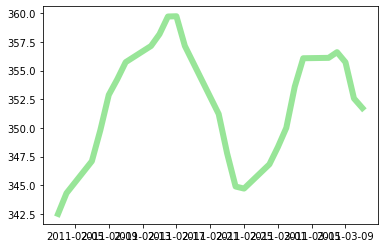

In [36]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd

dates, closing_prices = np.loadtxt('./data/aapl.csv', delimiter=',',
    usecols=(1, 6), unpack=True, dtype='M8[D], f8', converters={1: dmy2ymd})

weights = np.exp(np.linspace(-1, 0, 5))
weights /= weights.sum()
sma5 = np.convolve(closing_prices, weights[::-1], 'valid')
plt.plot(dates[4:], sma5, c='limegreen', alpha=0.5,
        linewidth=6, label='SMA-5')